In [18]:
import sklearn
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import os
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [9]:
def unPickleData(filename):
  with open(filename,'rb') as f: arr = pickle.load(f)
  return arr

def getDataPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"processed_data", dirname,filename)

x_data = unPickleData(getDataPath("posts","X_posts.pkl"))
y_data = unPickleData(getDataPath("posts","Y_posts.pkl"))

from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(x_data,y_data, train_size=0.6 , random_state= 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5 , random_state= 42)

In [10]:
import pickle
def getSavedModelPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"savedModels", dirname,filename)

bestLogisticRegressionClassifier = pickle.load(open(getSavedModelPath("posts","LogisticRegression.pkl"), "rb"))
print(bestLogisticRegressionClassifier)

LogisticRegression(C=3, multi_class='ovr', solver='liblinear')


In [11]:
y_pred = bestLogisticRegressionClassifier.predict(X_test)

print(sklearn.metrics.classification_report(y_test,y_pred))
print(f"Accuracy = {sklearn.metrics.accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10624
           1       0.79      0.45      0.57      1835

    accuracy                           0.90     12459
   macro avg       0.85      0.71      0.76     12459
weighted avg       0.89      0.90      0.89     12459

Accuracy = 0.9012761858897183


In [12]:
y_pred = bestLogisticRegressionClassifier.predict(np.concatenate((X_test,X_valid))
)
print(sklearn.metrics.classification_report(np.concatenate((y_test,y_valid)),y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(np.concatenate((y_test,y_valid)), y_pred))


              precision    recall  f1-score   support

           0       0.91      0.98      0.95     21304
           1       0.80      0.45      0.58      3613

    accuracy                           0.90     24917
   macro avg       0.86      0.72      0.76     24917
weighted avg       0.90      0.90      0.89     24917

Accuracy:  0.9043624834450376


[learning_curve] Training set sizes: [  186   564   941  1319  1697  2074  2452  2829  3207  3584  3962  4339
  4717  5095  5472  5850  6227  6605  6982  7360  7737  8115  8493  8870
  9248  9625 10003 10380 10758 11135 11513 11891 12268 12646 13023 13401
 13778 14156 14533 14911 15289 15666 16044 16421 16799 17176 17554 17931
 18309 18687]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.8min finished


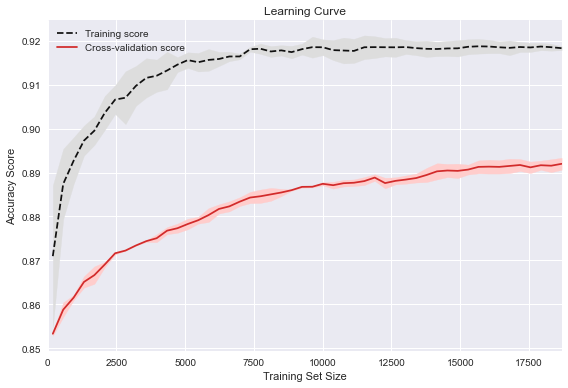

In [13]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(bestLogisticRegressionClassifier, X_train, y_train, cv = 2, scoring='accuracy', n_jobs=1, train_sizes=np.linspace(0.01, 1, 50), verbose=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#D22B2B", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#ffcdcc")

# plt.ylim([0, 1])
plt.xlim([0, train_sizes[-1]])
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

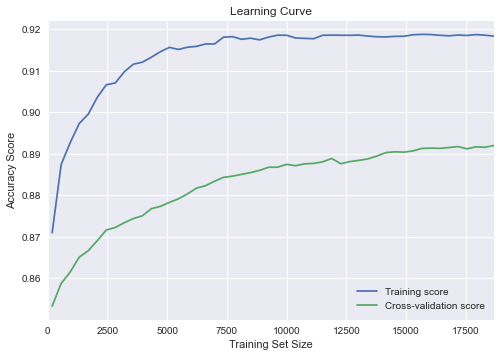

In [20]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, test_mean, label="Cross-validation score")

plt.xlim([0, train_sizes[-1]])
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.show()